In [1]:
import h5py
import PIL, PIL.ImageFont, PIL.Image, PIL.ImageDraw, PIL.ImageChops, PIL.ImageOps
import os
import random
import string
import numpy
import sys
import matplotlib.pyplot as plt

%matplotlib inline

### List of characters

In [10]:
chars = string.ascii_letters# + string.digits + string.punctuation
print(chars)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ


### Gets fonts

In [3]:
def get_ttfs(d='/Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf'):
    for dirpath, dirname, filenames in os.walk(d):
        for filename in filenames:
            if filename.endswith('.ttf') or filename.endswith('.otf'):
                yield os.path.join(dirpath, filename)

In [4]:
w, h = 128,128#64, 64
# w0, h0 = 64, 64 #128, 128

In [5]:
def read_font(fn):
    # loads a font object
    font = PIL.ImageFont.truetype(fn, 60)#175)

#     # We need to make sure we scale down the fonts but preserve the vertical alignment
#     min_ly = float('inf')
#     max_hy = float('-inf')
#     max_width = 0
#     imgs = []

    data = []
    for char in chars:
#         print ('Character: ', char)
        # Create image of character
        img = PIL.Image.new("L", (w, h), 255) # "L" = 8bit pixels B+W, 255 is for white background
        draw = PIL.ImageDraw.Draw(img)
        draw.text((0, 0), char, font=font)
        
        matrix = numpy.array(img.getdata()).reshape((h, w))
        data.append(matrix)
#     print(data[0].shape)
    plt.figure(figsize=[15,10])
    for i in range(len(data)):
        plt.subplot(10,10,i+1)
        plt.imshow(data[i],cmap='gray',interpolation='lanczos')

    return numpy.array(data)

### Gets the data

In [6]:
# c = 0
# for fn in get_ttfs(d = '/Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf'):#(d=sys.argv[1]):
#     print (fn)
#     data = read_font(fn)
#     c+=1
#     break
# print(c)
    

In [7]:
f = h5py.File('fonts.hdf5', 'w')
dset = f.create_dataset('fonts', (1, len(chars), h, w), chunks=(1, len(chars), h, w), maxshape=(None, len(chars), h, w), dtype='u1')

0 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
(94, 128, 128)
1 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf
(94, 128, 128)
2 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf
(94, 128, 128)
3 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf
(94, 128, 128)
4 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf
(94, 128, 128)
5 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf
(94, 128, 128)
6 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf

/Users/robertomac/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(94, 128, 128)
21 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf
(94, 128, 128)
22 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf
(94, 128, 128)
23 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf
(94, 128, 128)
24 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf
(94, 128, 128)
25 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf
(94, 128, 128)
26 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf
(94, 128, 128)
27 /Users/robertomac/anaconda/pkgs/matplotlib-2.0.2

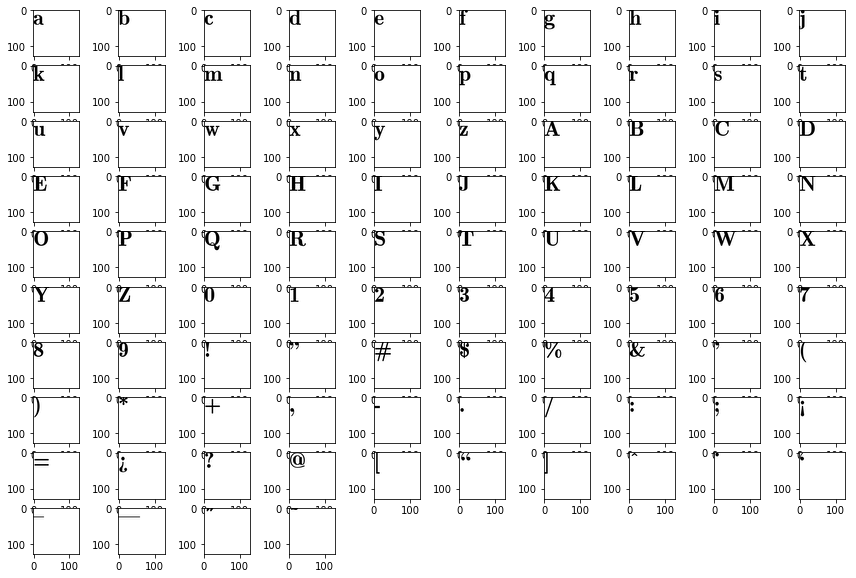

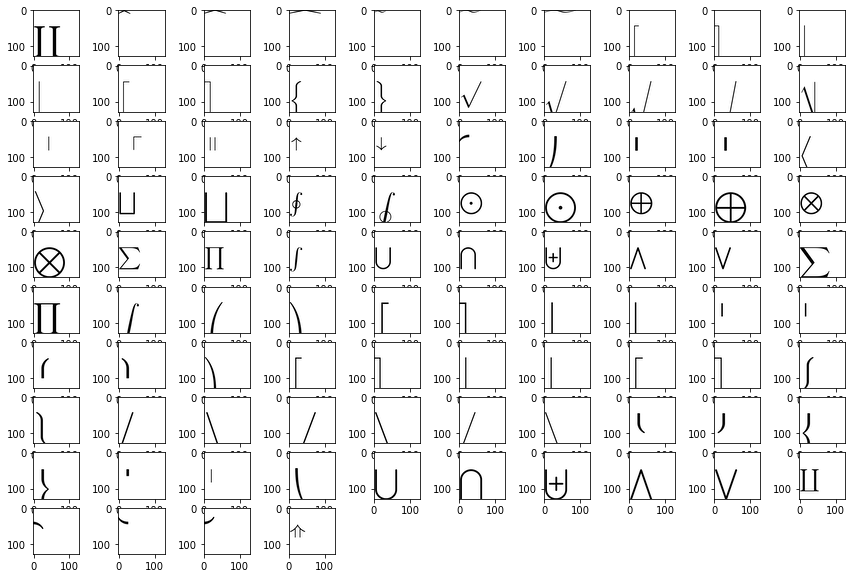

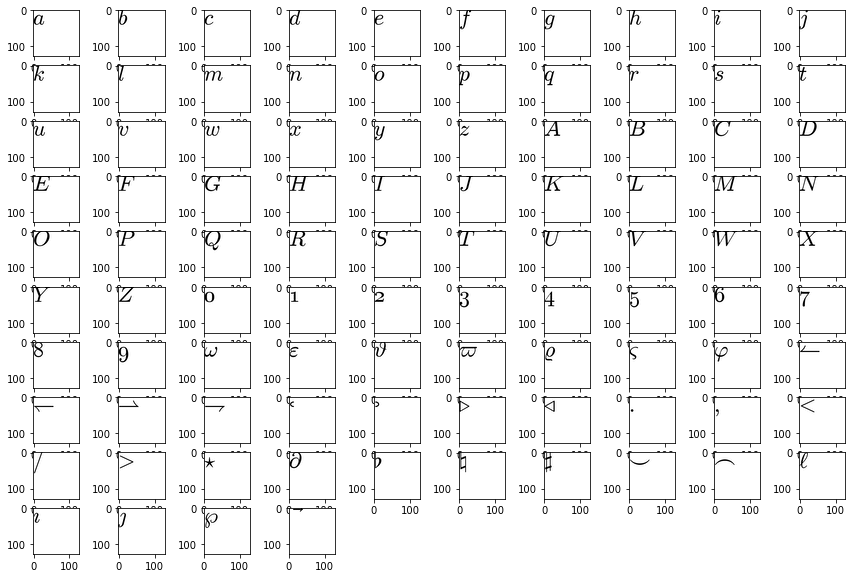

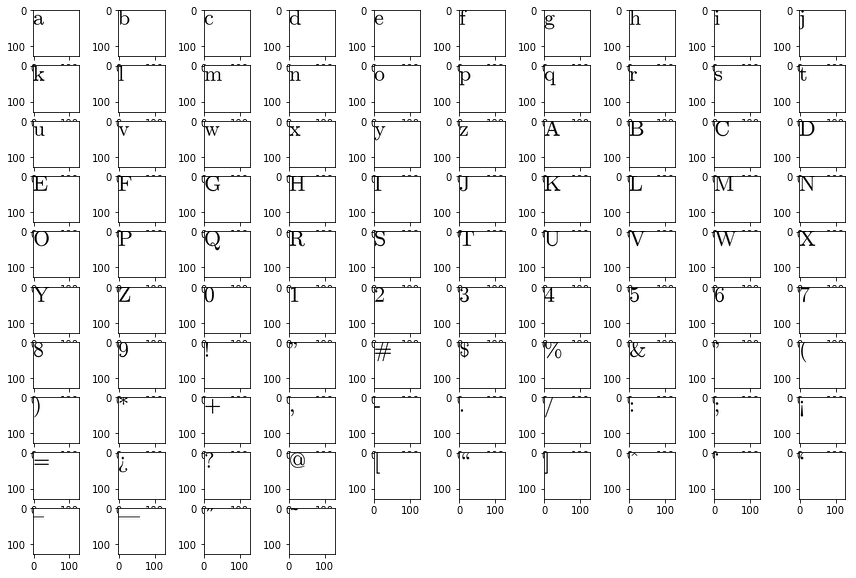

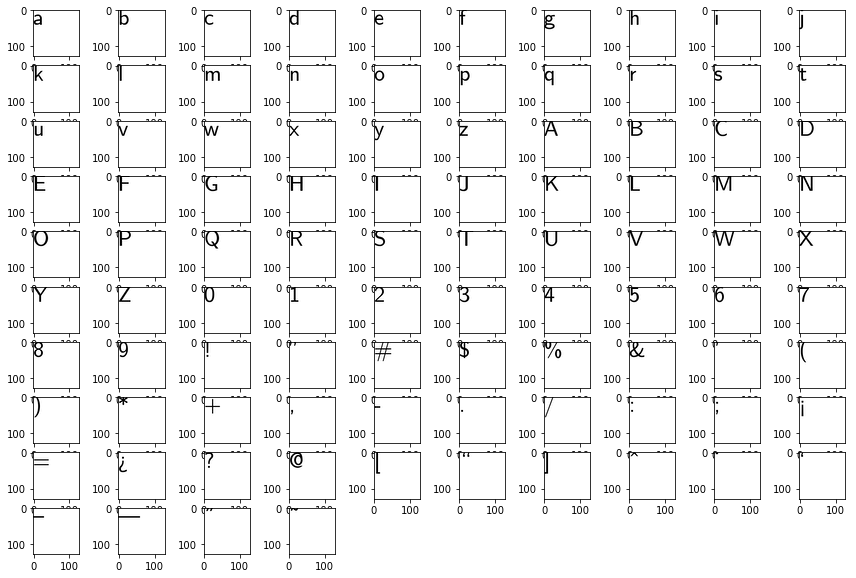

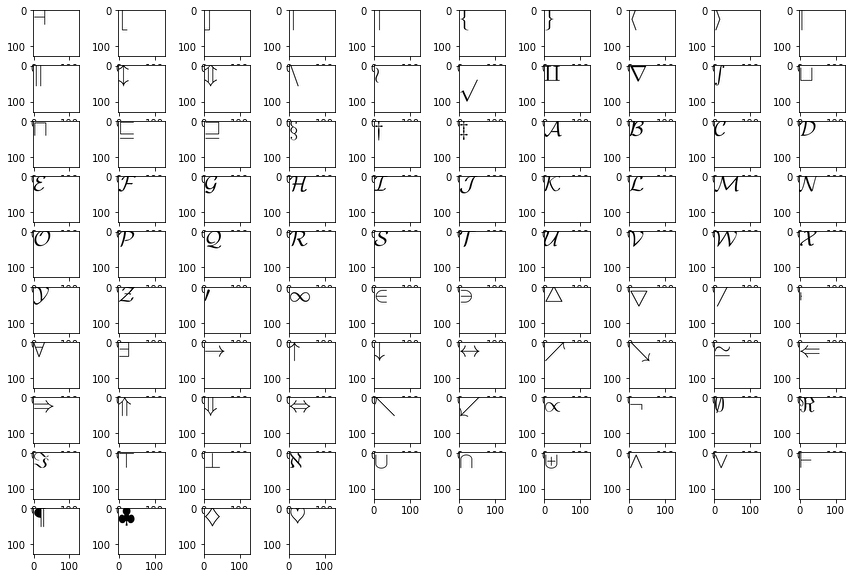

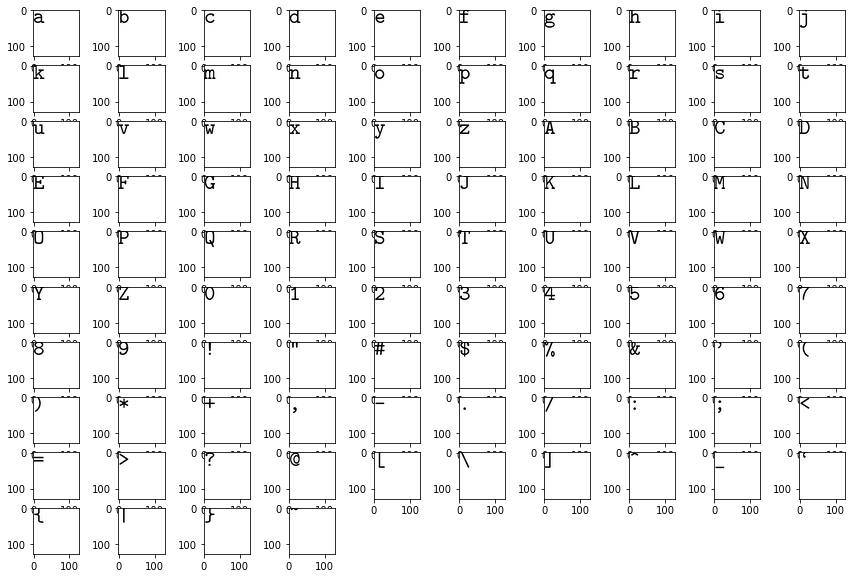

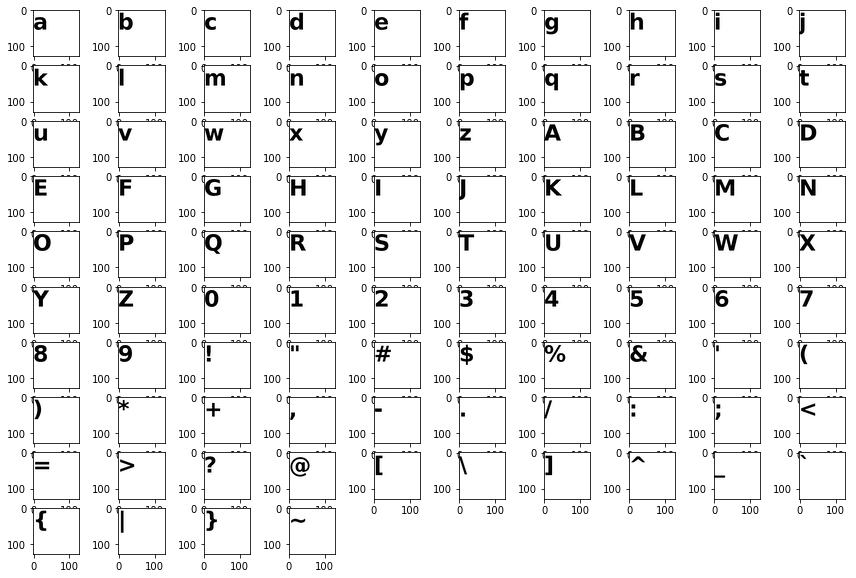

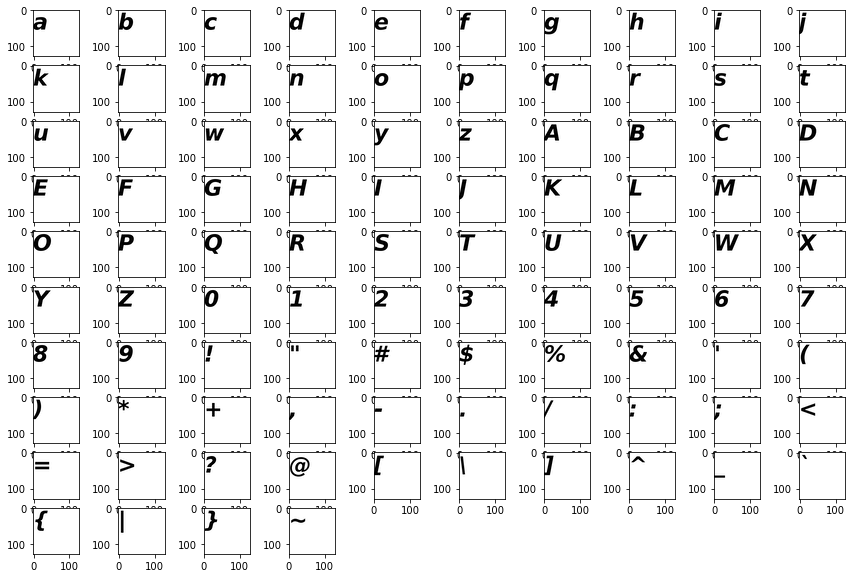

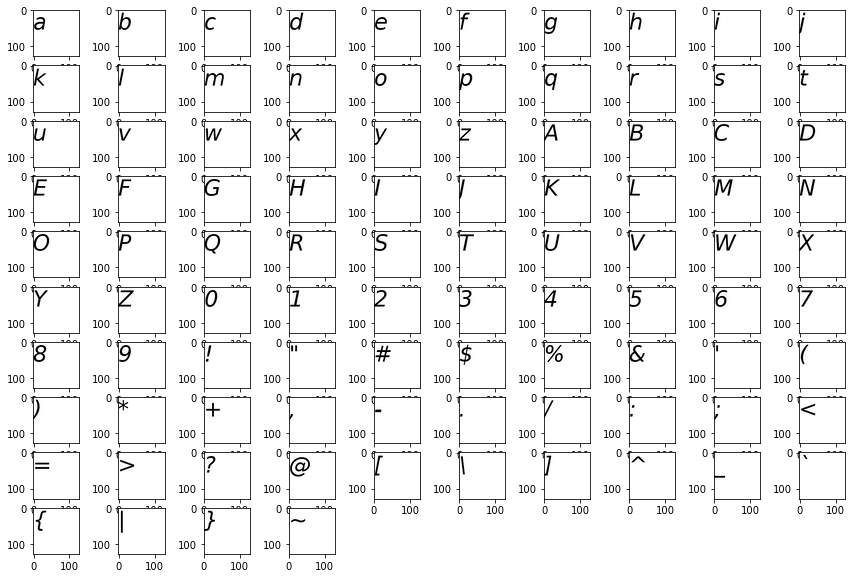

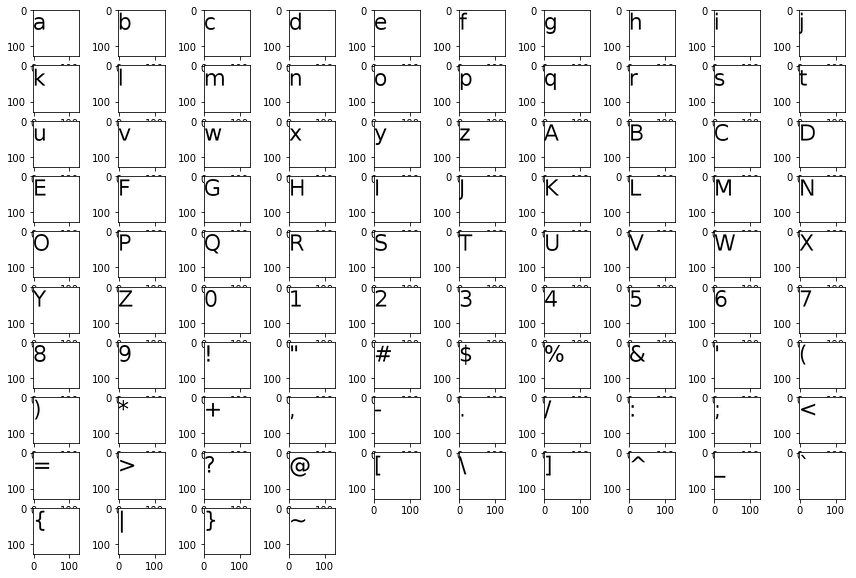

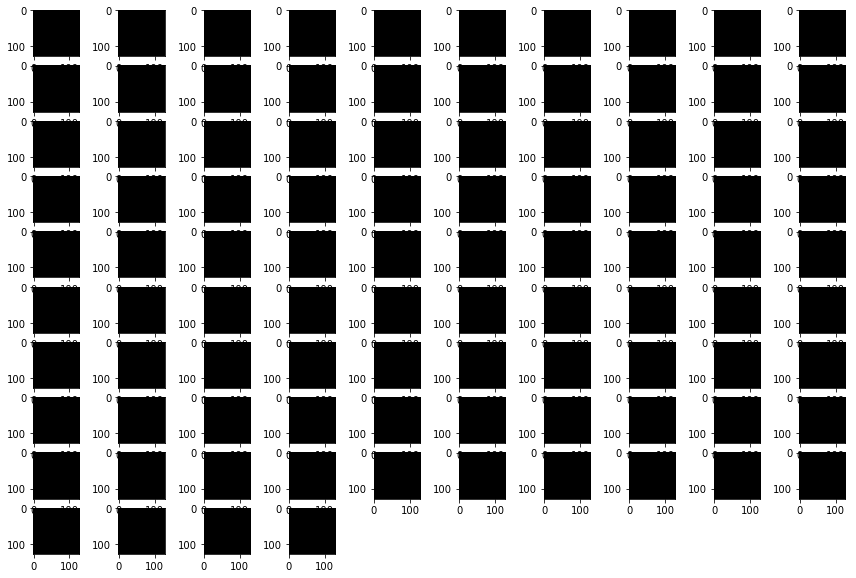

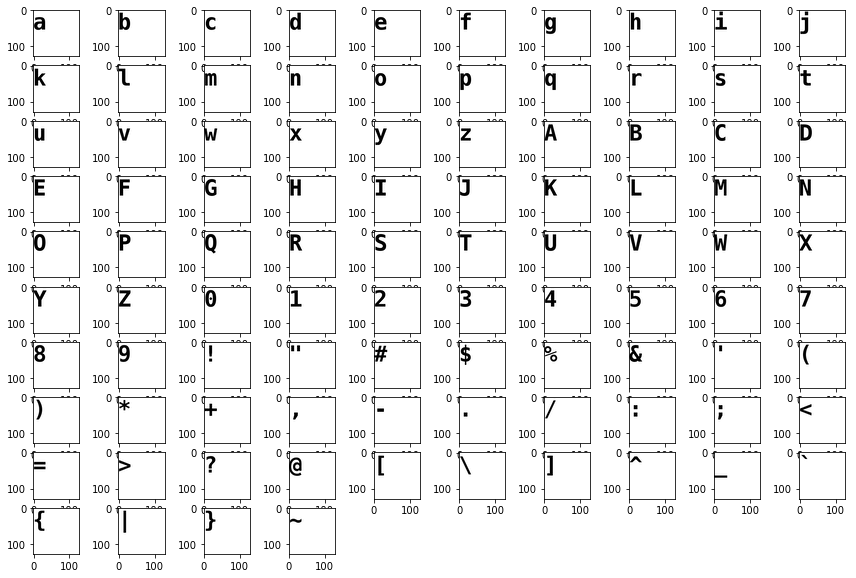

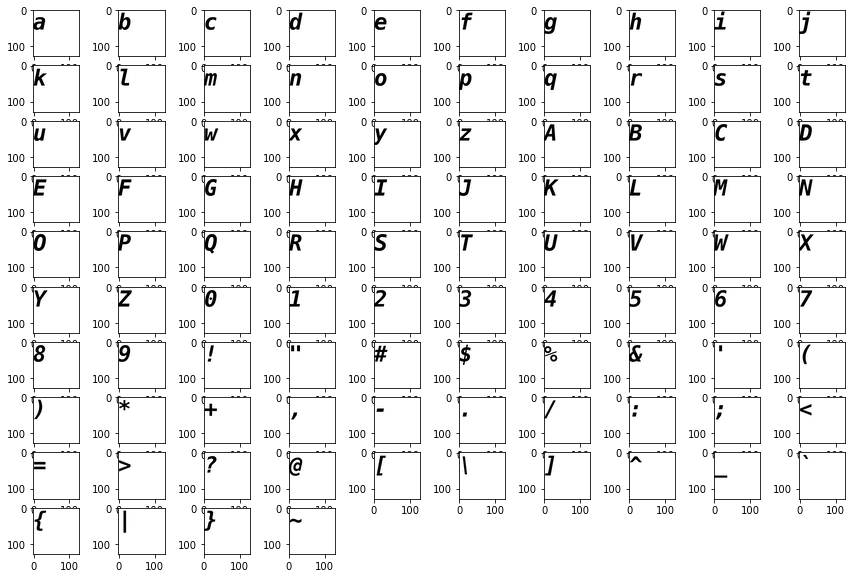

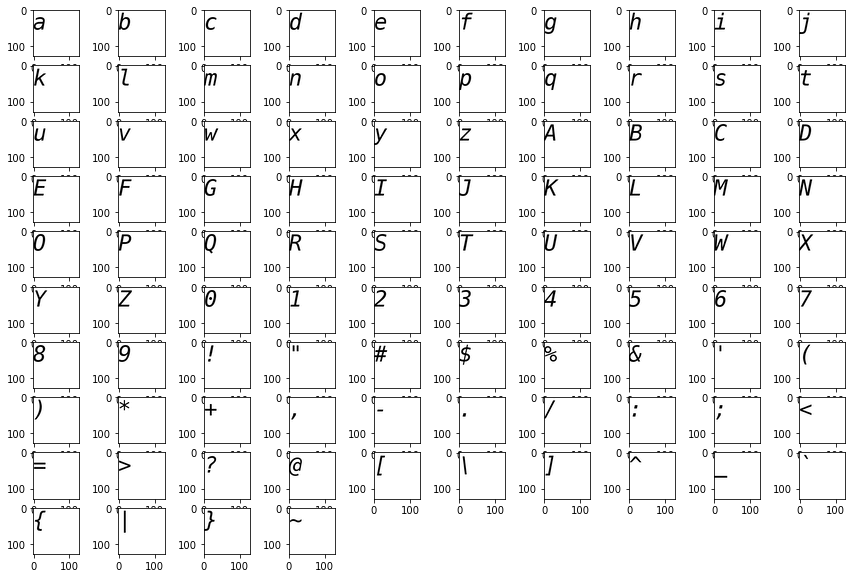

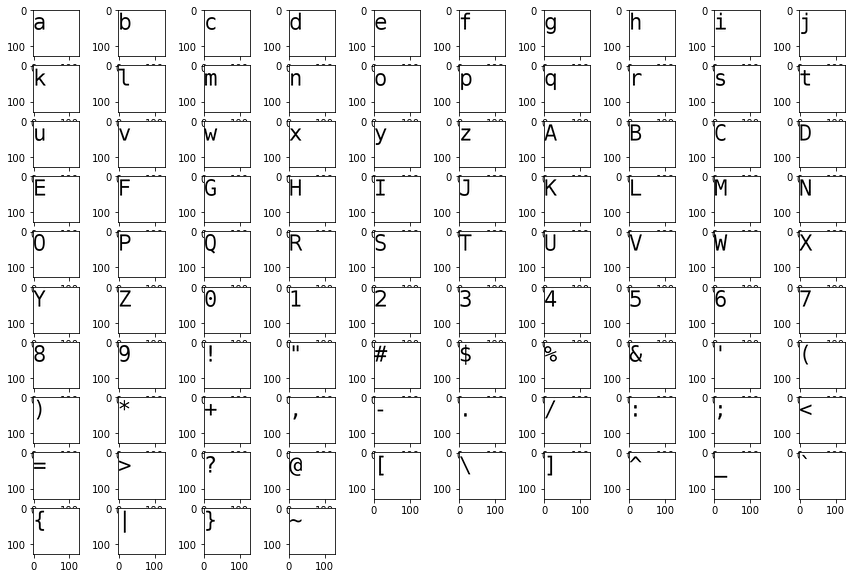

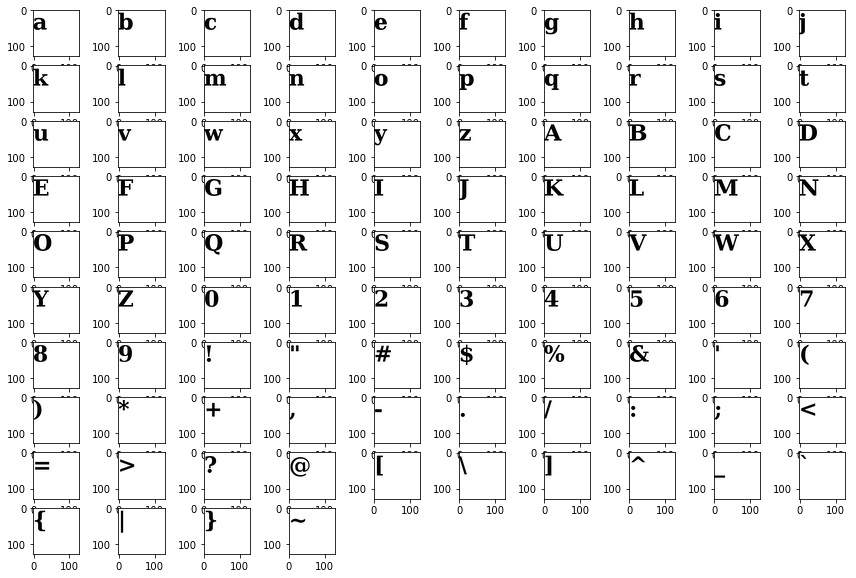

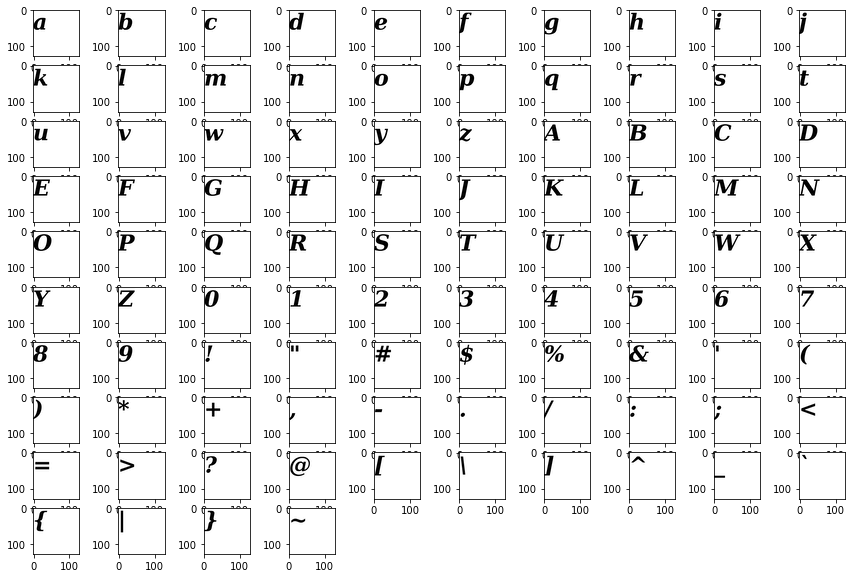

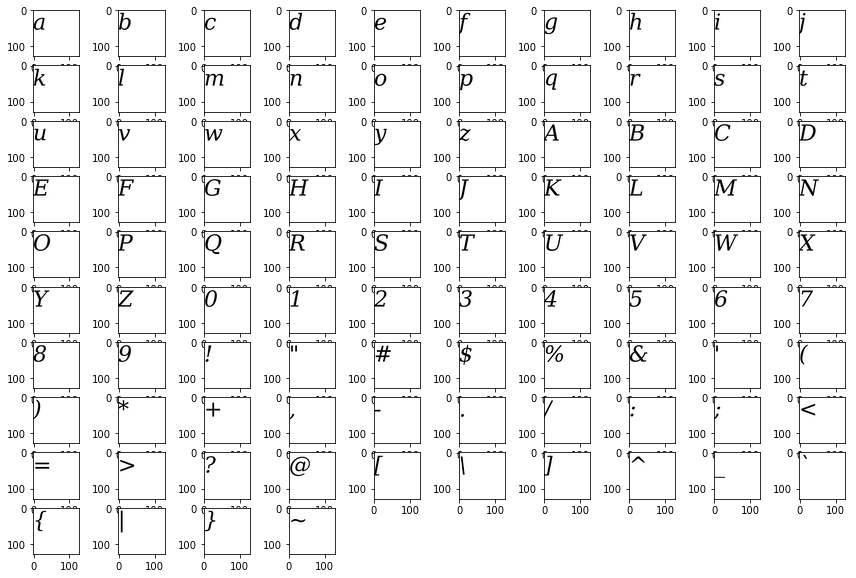

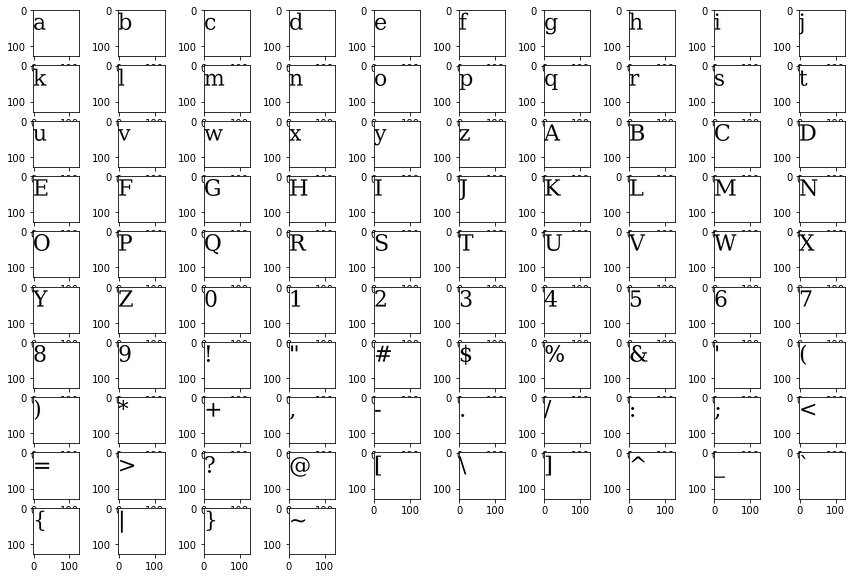

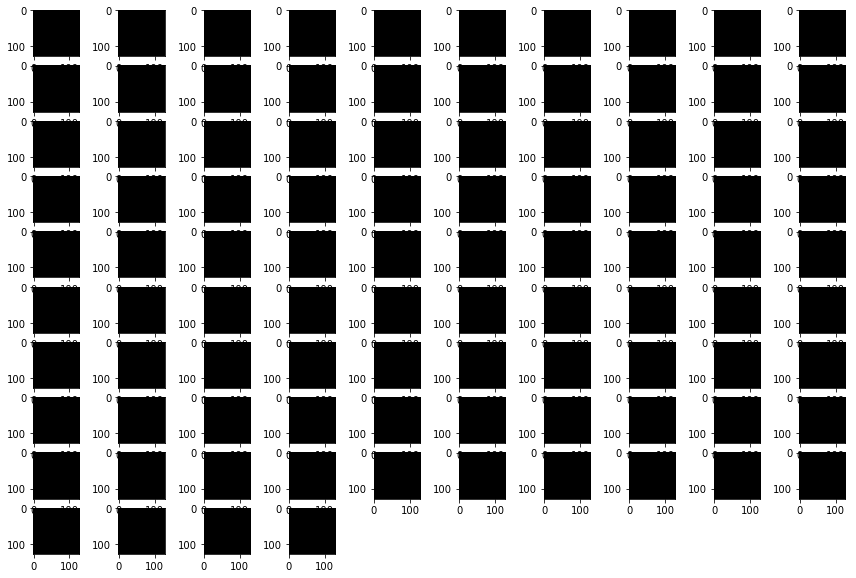

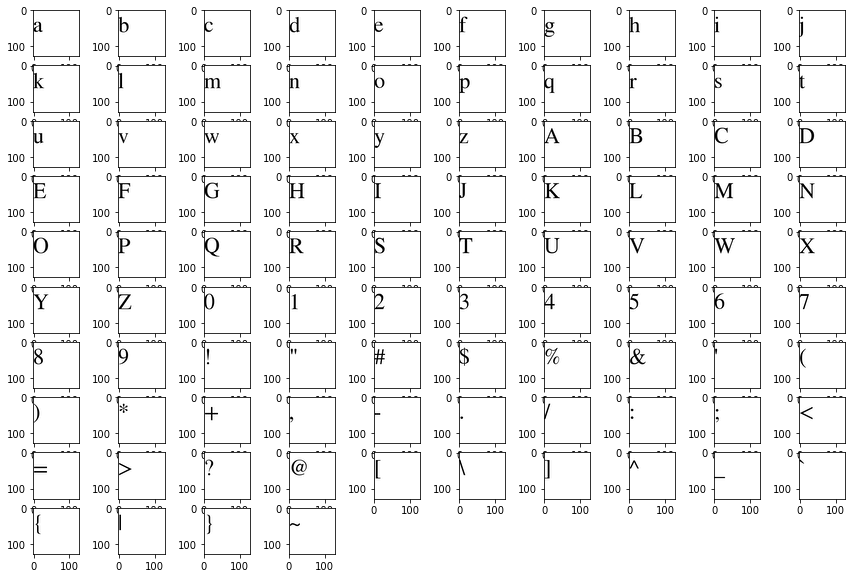

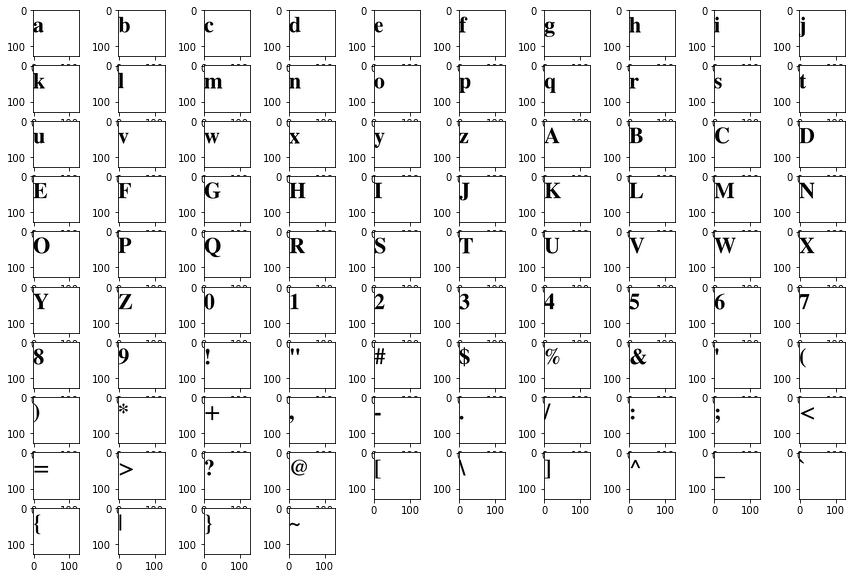

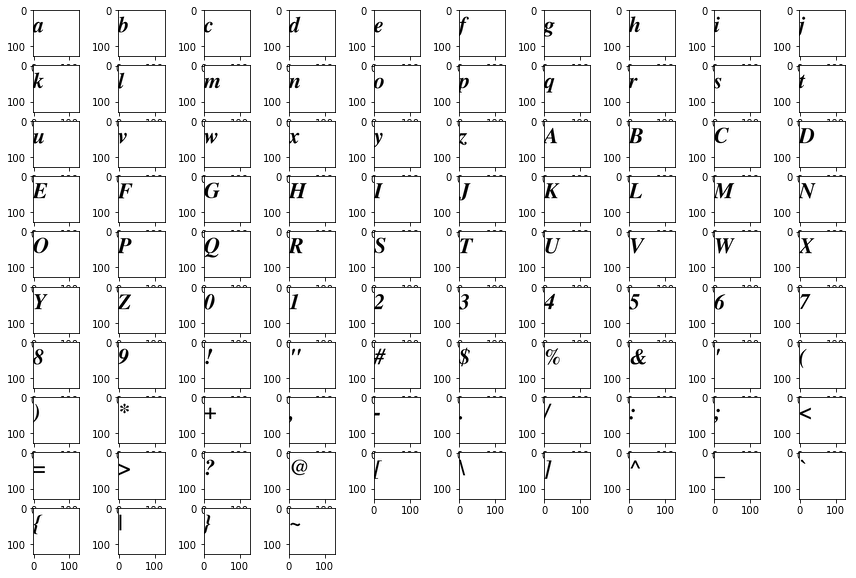

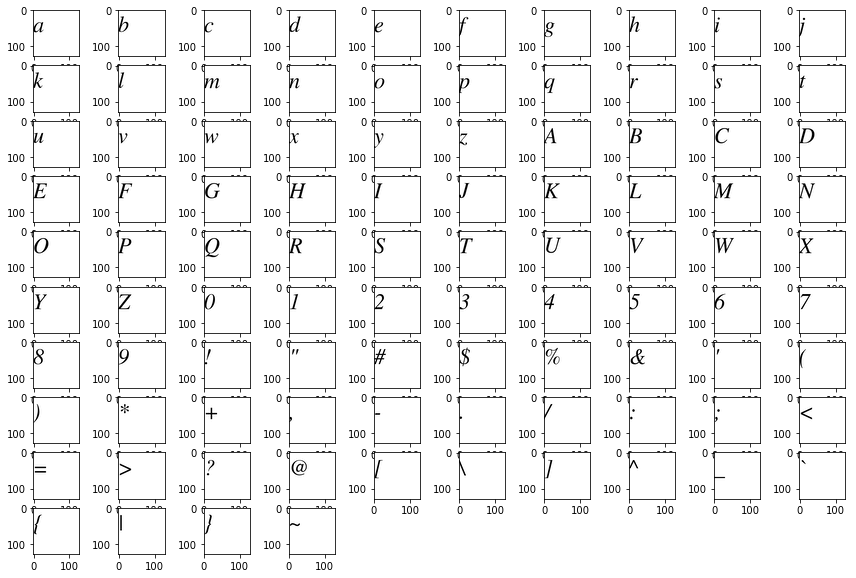

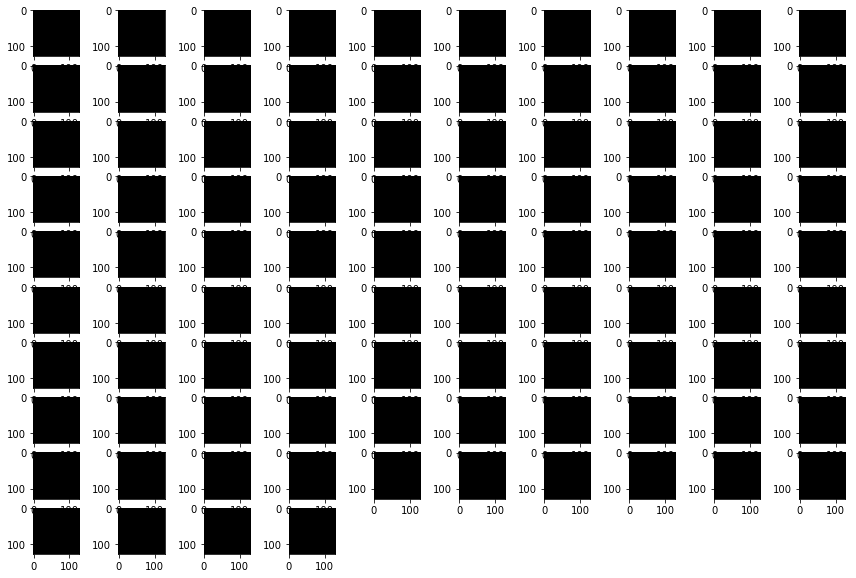

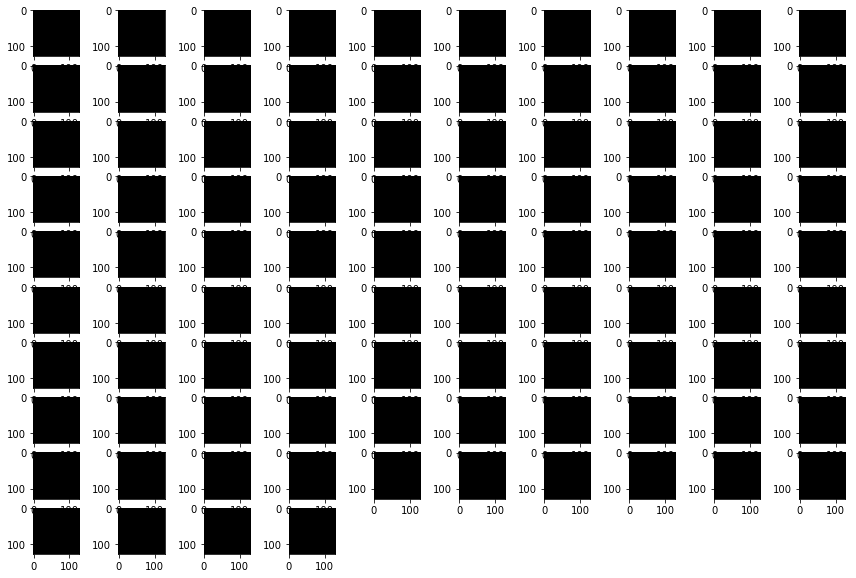

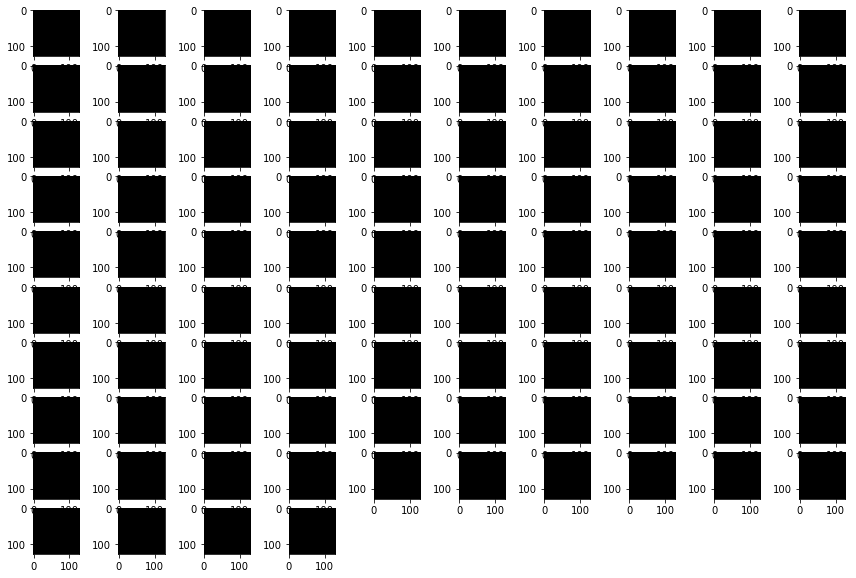

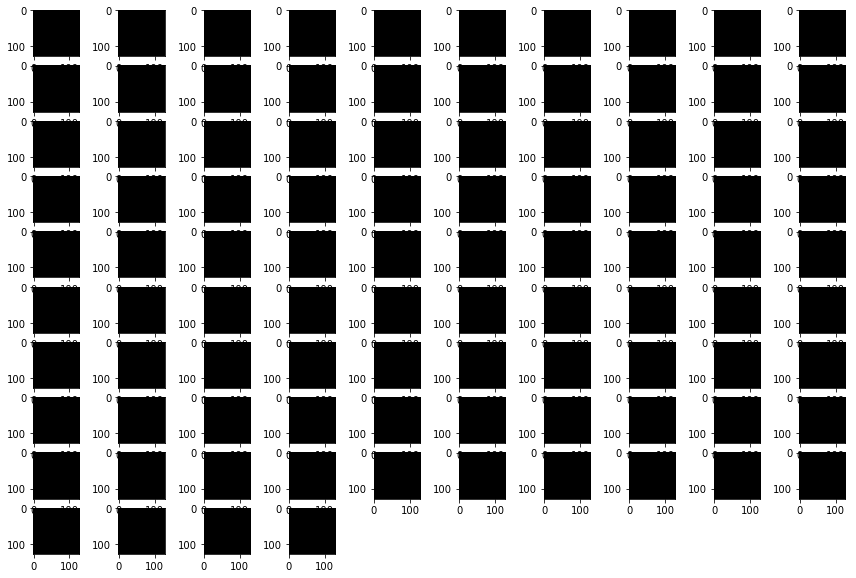

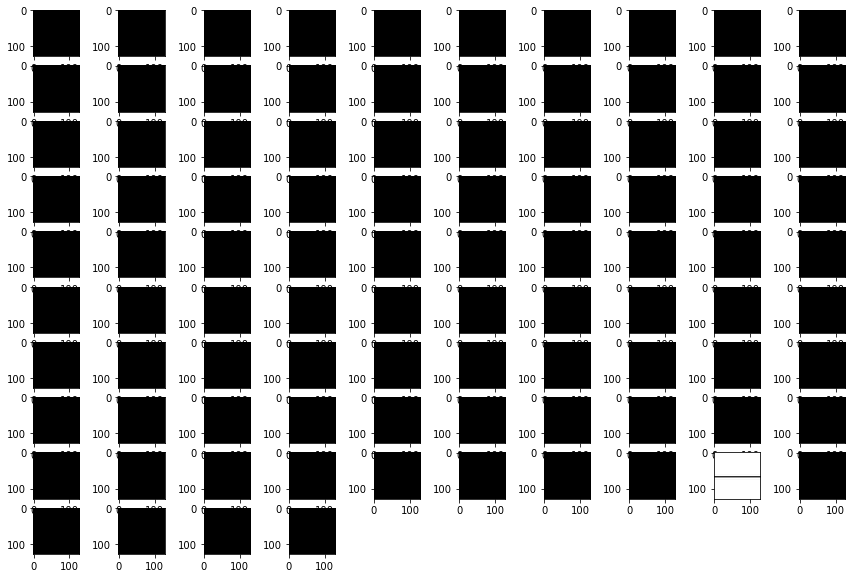

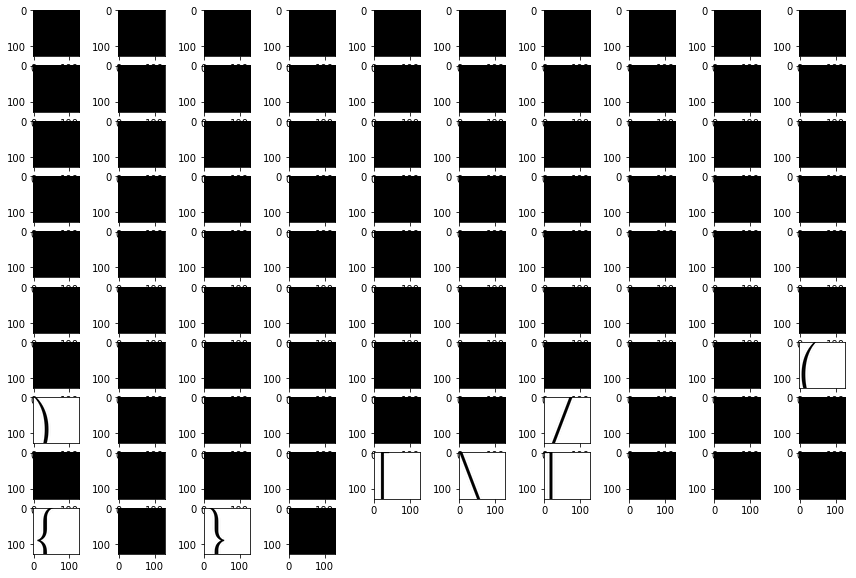

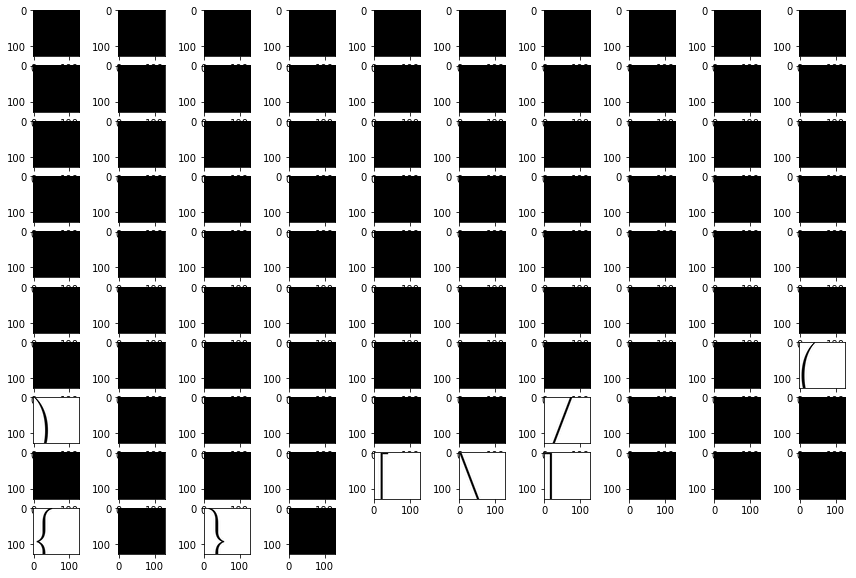

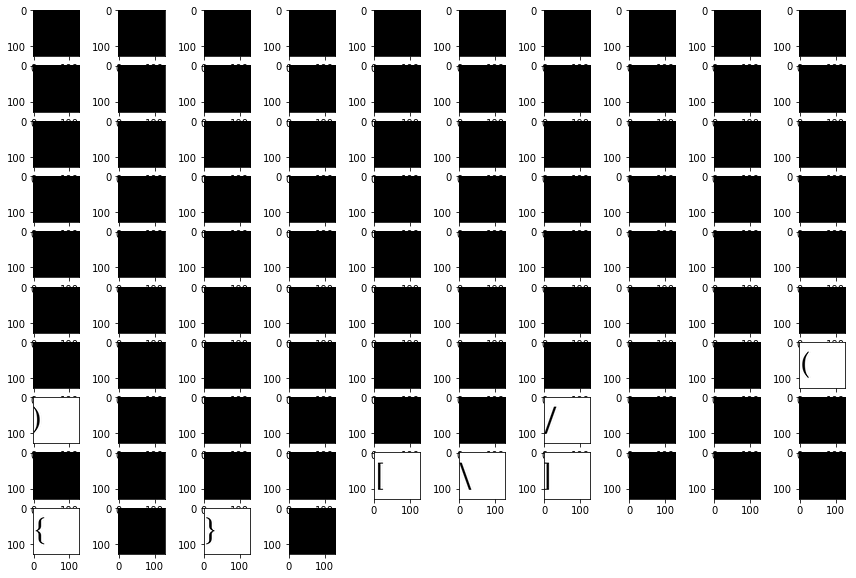

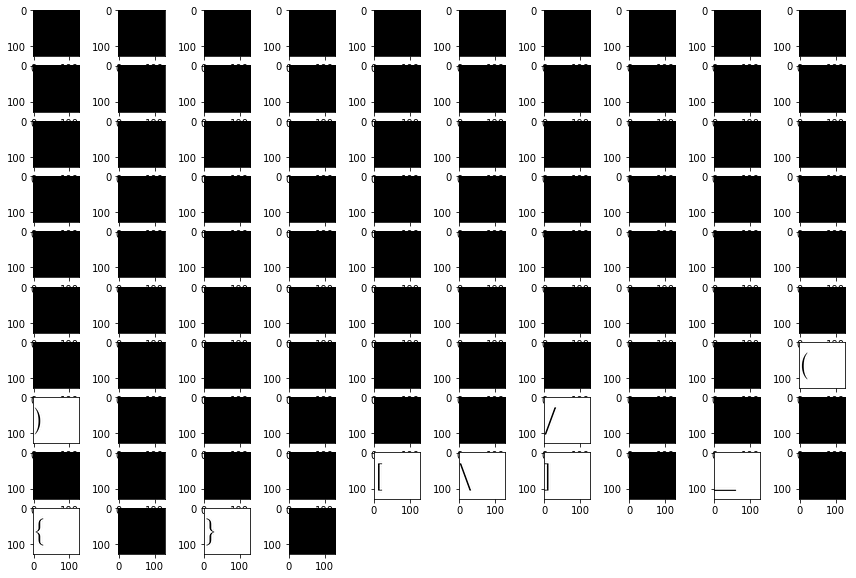

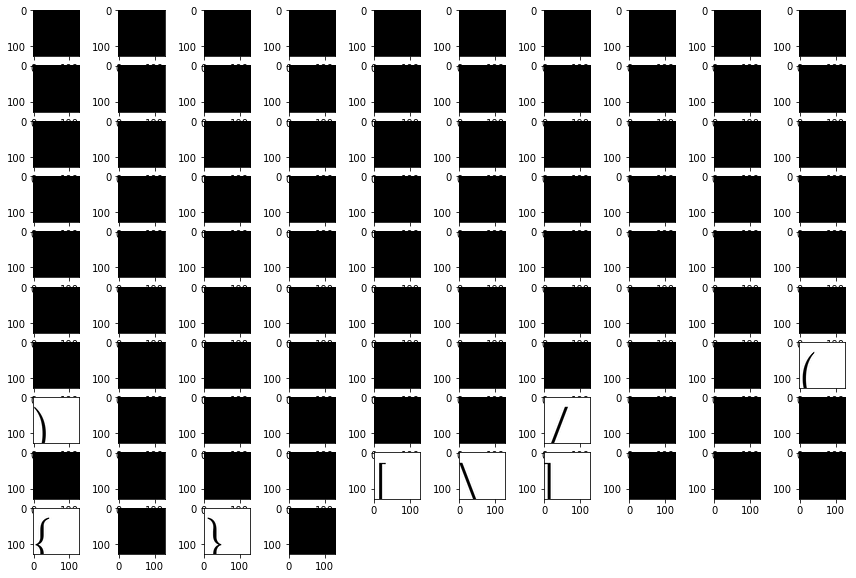

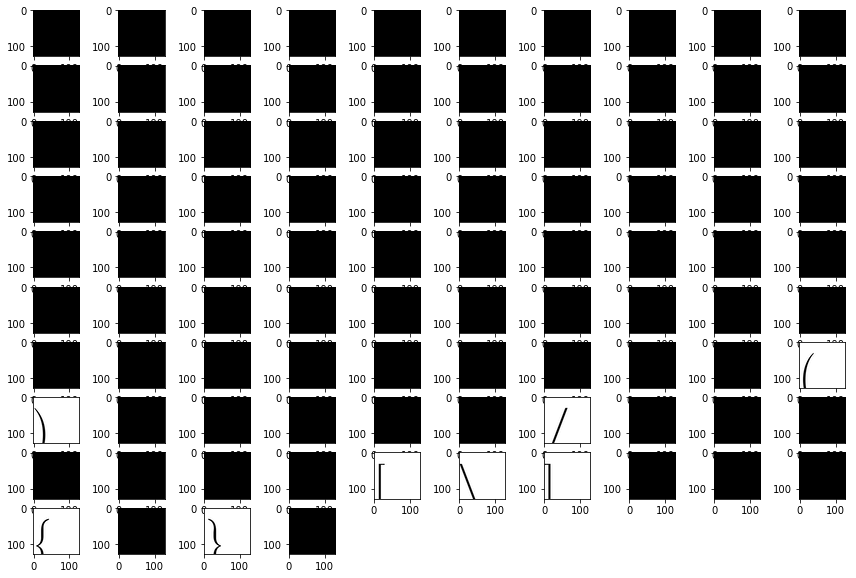

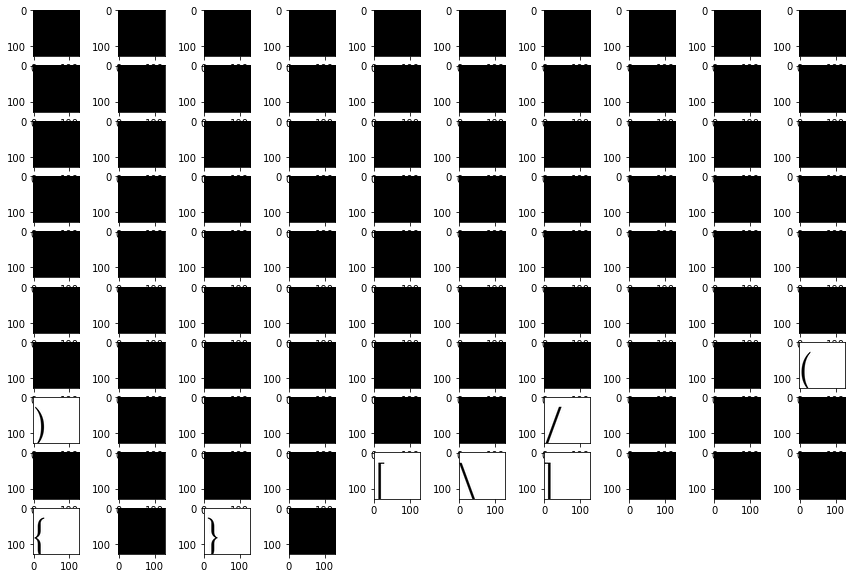

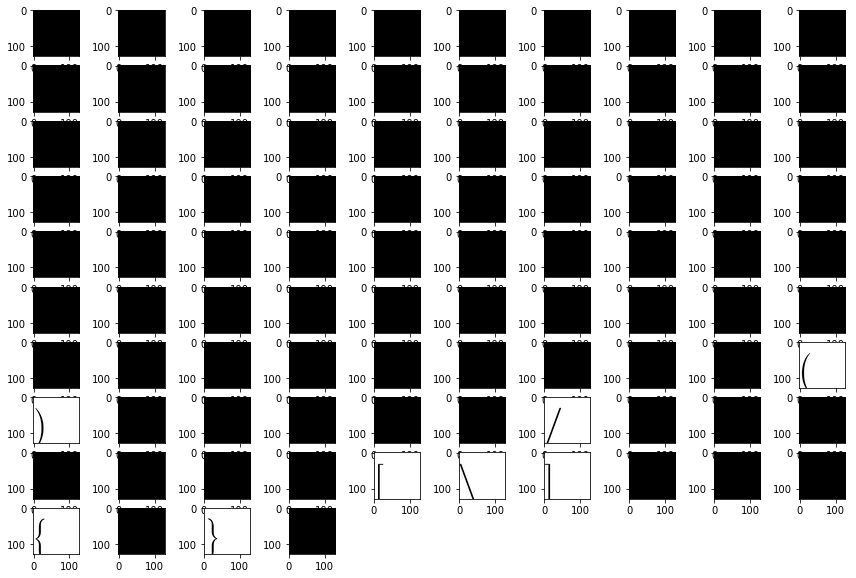

In [8]:
i = 0
for fn in get_ttfs(d = '/Users/robertomac/anaconda/pkgs/matplotlib-2.0.2-np113py36_0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf'):#(d=sys.argv[1]):
    print (i,fn)
    try:
        data = read_font(fn)
    except: # IOError:
        print ('was not able to read', fn)
        continue

    print (data.shape)
    dset.resize((i+1, len(chars), h, w))
    dset[i] = data
    i += 1
    f.flush()
#    if i == 4:
#        break

In [9]:
f.close()